# Page View Time Series Visualizer

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

* Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
* Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
* Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
* Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

### Importing important libraries

In [295]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime as dt

%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'


### Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [296]:
views_df = pd.read_csv(r'C:\Users\loren\Desktop\Data Analysis\Time Series Visualizer\fcc-forum-pageviews.csv')

In [297]:
views_df['date'] = pd.to_datetime(views_df['date'])

In [298]:
views_df.set_index('date', inplace=True)

In [299]:
views_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [300]:
views_df = views_df[views_df['value'] >= views_df['value'].quantile(0.025)]

In [301]:
views_df = views_df[views_df['value'] <= views_df['value'].quantile(0.975)]

In [302]:
views_df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


### Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

Text(0, 0.5, 'Page Views')

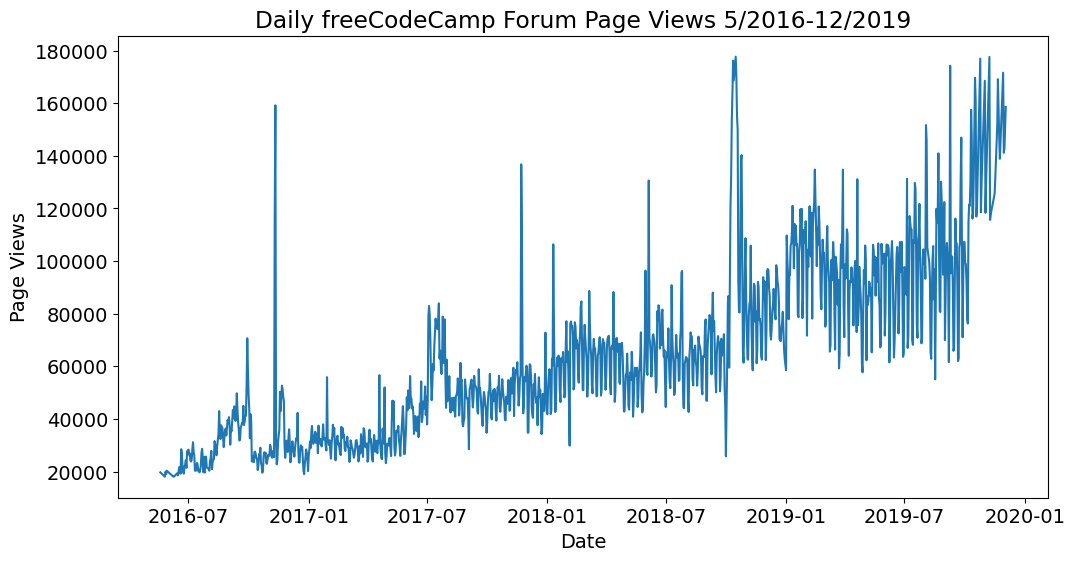

In [303]:
plt.figure(figsize=(12,6))
plt.plot(views_df.index, views_df.value)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')

### Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [304]:
views_df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [305]:
views_df["day"] = views_df.index.day
views_df["month"] = views_df.index.month
views_df["year"] = views_df.index.year

In [306]:
views_df_grouped = views_df.groupby(["year", "month"])["value"].mean()

In [307]:
views_df_grouped = views_df_grouped.unstack()

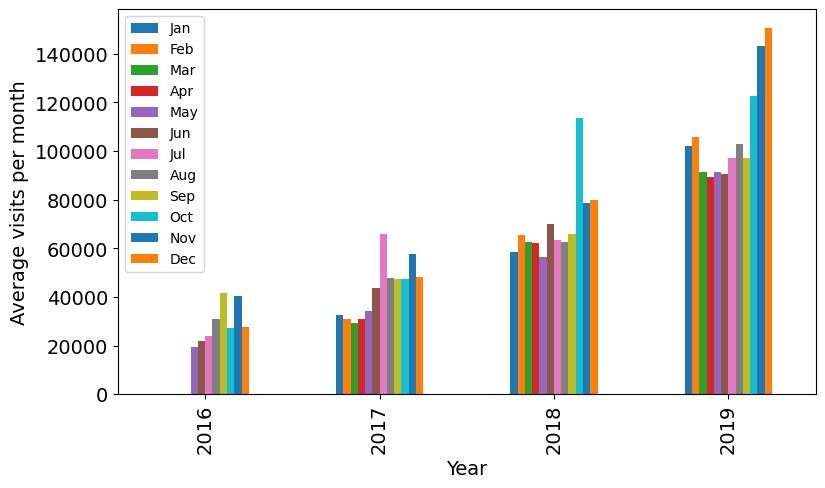

In [308]:
views_df_grouped_plotted = views_df_grouped.plot.bar(legend=True, ylabel="Average visits per month", xlabel="Year")
plt.legend(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], loc='upper left',  prop={'size': 10})

### Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [309]:
df_box = views_df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [314]:
df_box["month_num"] = df_box["date"].dt.month
df_box = df_box.sort_values("month_num")
df_box

,date,value,day,month,year,month_num
210,2017-01-06,37353,6,Jan,2017,1
938,2019-01-06,94108,6,Jan,2019,1
937,2019-01-05,77897,5,Jan,2019,1
936,2019-01-04,94514,4,Jan,2019,1
935,2019-01-03,100710,3,Jan,2019,1
...,...,...,...,...,...,...
567,2017-12-29,72819,29,Dec,2017,12
566,2017-12-28,51018,28,Dec,2017,12
565,2017-12-27,43075,27,Dec,2017,12
201,2016-12-28,28424,28,Dec,2016,12


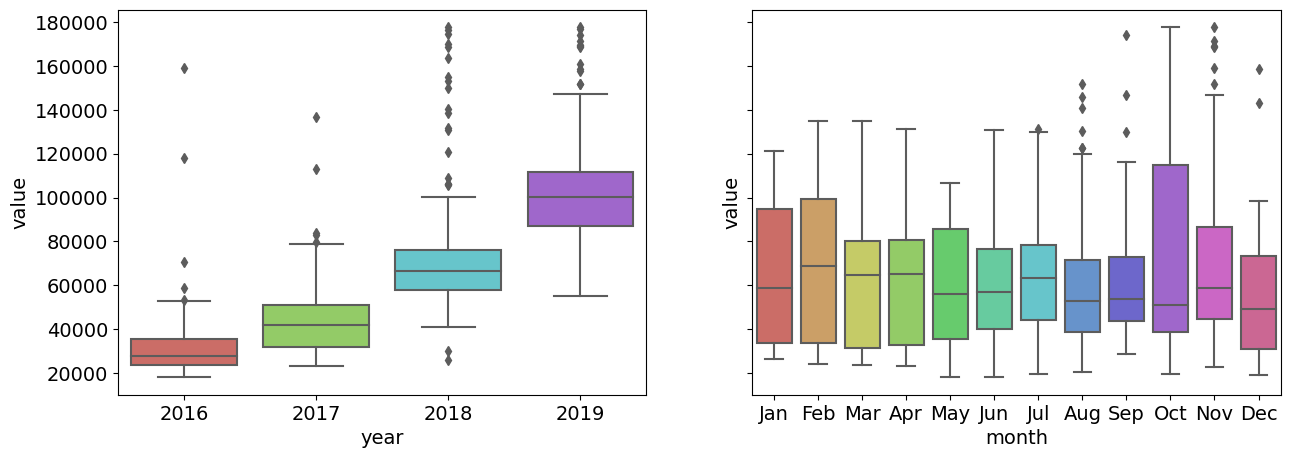

In [315]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Months
axes[1] = sns.boxplot(x = 'month', y = 'value', data = df_box, palette = 'hls', ax=axes[1])

#Year
axes[0] = sns.boxplot(x = 'year', y = 'value', data = df_box, palette = 'hls', ax=axes[0])


